In [1]:

# Set up notebook
%pprint
%matplotlib inline
import sys
import os.path as osp, os as os

executable_path = sys.executable
scripts_folder = osp.join(osp.dirname(executable_path), 'Scripts'); assert osp.exists(scripts_folder)
py_folder = osp.abspath(osp.join(os.pardir, 'py')); assert osp.exists(py_folder), "Create the py folder"
shared_folder = osp.abspath(osp.join(os.pardir, 'share')); assert osp.exists(shared_folder), "You are missing the share folder"

if (scripts_folder not in sys.path): sys.path.insert(1, scripts_folder)
if (py_folder not in sys.path): sys.path.insert(1, py_folder)
if shared_folder not in sys.path: sys.path.insert(1, shared_folder)

from notebook_utils import NotebookUtilities
nu = NotebookUtilities(
    data_folder_path=osp.abspath(osp.join(os.pardir, 'data')),
    saves_folder_path=osp.abspath(osp.join(os.pardir, 'saves'))
)

Pretty printing has been turned OFF


In [ ]:

import random

# Generate a random fixed point in the CIELAB color space
ranges = [(0, 100), (-128, 127), (-128, 127)]
fixed_point = tuple([random.uniform(a, b) for a, b in ranges])

# Generate a random number of additional points to spread, between 1 and 15
random_point_count = random.randint(1, 15)

# Initialize a list to store trial results
trials = []

# Perform up to 5 trials to find the best spread of points
from colormath.color_objects import LabColor
while len(trials) < 5:
    
    # Attempt to spread the points evenly within a unit cube
    try:
        spread_points = nu.spread_points_in_cube(
            random_point_count, fixed_point, *ranges, verbose=False
        )

        # Ensure spread points have all unique XKCD names
        xkcd_set = set()
        for lab_color in spread_points:
            rgb_color = nu.lab_to_rgb(LabColor(*lab_color))
            nearest_neighbor = nu.get_nearest_neighbor(rgb_color, self.xkcd_colors)
            xkcd_set.add(self.nearest_xkcd_name_dict[nearest_neighbor])
        if len(xkcd_set) == len(spread_points):
            
            # Measure how far the points are from the fixed point
            spread_value = nu.calculate_spread(spread_points[1:], fixed_point, verbose=False)
            
            # Store the result as a tuple of (spread_points, spread_value)
            trial_tuple = (spread_points, spread_value)
            trials.append(trial_tuple)
    
    # If an error occurs (e.g., a spread point too close to black or white), skip this trial
    except Exception:
        continue

# Select the trial with points as far away from the fixed point as possible
trial_tuple = max(trials, key=lambda x: x[1])

# Extract the spread points from the best trial
spread_points = []
for lab_color in trial_tuple[0]:
    rgb_color = nu.lab_to_rgb(LabColor(*lab_color))
    spread_points.append(rgb_color)

# Visualize the spread points
nu.inspect_spread_points(spread_points, verbose=False)

In [3]:

# Get a hand-valued dictionary of font sizes for each country
fontsize_dict = {
    'Iran': 140,
    'Turkey': 82,
    'Iraq': 76,
    'Egypt': 60,
    'Yemen': 50,
    'Saudi Arabia': 46,
    'Oman': 36,
    'Syria': 36,
    'Jordan': 18,
    'Israel': 8,
    'Kuwait': 8,
    'United Arab Emirates': 6,
    'Lebanon': 5,
    'Qatar': 4,
    'Bahrain': 1,
}

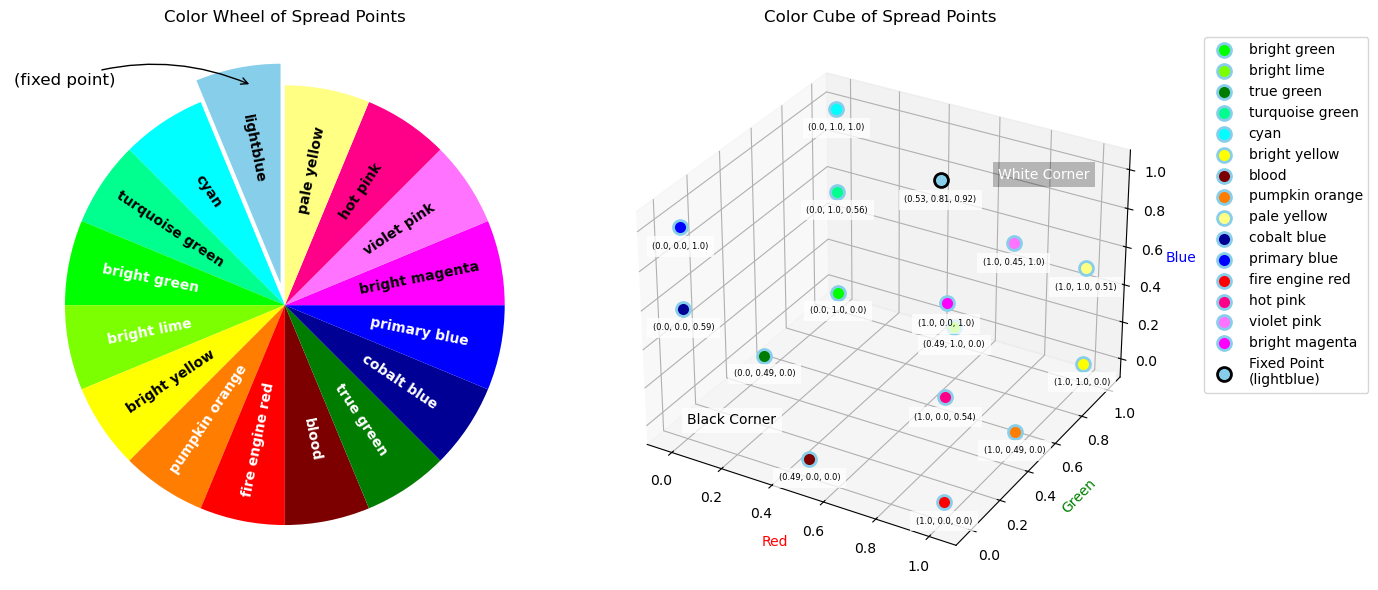

In [4]:

import random

# Generate a random fixed point in the normalized RGB color space
ranges = [(0, 1), (0, 1), (0, 1)]
# fixed_point = tuple([random.uniform(a, b) for a, b in ranges])
fixed_point = (0.529, 0.808, 0.922)  # The ocean color

# Generate a random number of additional points to spread, between 1 and 15
# random_point_count = random.randint(1, 15)
random_point_count = len(fontsize_dict)

# Initialize a list to store trial results
trials = []

# Perform up to 5 trials to find the best spread of points
while len(trials) < 5:
    
    # Attempt to spread the points evenly within a unit cube
    try:
        spread_points = nu.spread_points_in_cube(random_point_count, fixed_point, *ranges, verbose=False)

        # Ensure spread points have all unique XKCD names
        xkcd_set = set()
        for rgb_color in spread_points:
            nearest_neighbor = nu.get_nearest_neighbor(rgb_color, nu.xkcd_colors)
            xkcd_set.add(nu.nearest_xkcd_name_dict[nearest_neighbor])
        if len(xkcd_set) == len(spread_points):
            
            # Calculate the spread value, which measures how far the points are from the fixed point
            spread_value = nu.calculate_spread(spread_points[1:], fixed_point, verbose=False)
            
            # Store the result as a tuple of (spread_points, spread_value)
            trial_tuple = (spread_points, spread_value)
            trials.append(trial_tuple)
    
    # If an error occurs (e.g., a spread point too close to black or white), skip this trial
    except Exception:
        continue

# Select the trial with points as far away from the fixed point as possible
trial_tuple = max(trials, key=lambda x: x[1])

# Extract the spread points from the best trial
spread_points = trial_tuple[0]

# Visualize the spread points
nu.inspect_spread_points(spread_points, verbose=False)


Notice, above, that the colors are well-spaced in the 3D scatterplot but not on the pie chart.

In [5]:

# Test the transformation
ocean_color = (0.529, 0.808, 0.922)  # The ocean color
tolerance = 1e-3

# Convert RGB to CIELAB
LabColor_obj = nu.rgb_to_lab(ocean_color)

# Convert CIELAB back to RGB
rgb_color = nu.lab_to_rgb(LabColor_obj)

# Assert that the resulting RGB values are approximately equal to the original
assert all(abs(rc - oc) < tolerance for rc, oc in zip(rgb_color, ocean_color)), (
    f"RGB values {rgb_color} do not match original {ocean_color} within tolerance"
)

In [6]:

# Get a fixed point in the CIELAB color space
ranges = [(0, 100), (-128, 127), (-128, 127)]
# fixed_point = tuple([random.uniform(a, b) for a, b in ranges])
ocean_color = (0.529, 0.808, 0.922)  # light blue
fixed_point = nu.rgb_to_lab(ocean_color).get_value_tuple()
print(fixed_point)

# Initialize a list to store trial results
trials = []

# Perform up to 5 trials to find the best spread of points
from colormath.color_objects import LabColor
while len(trials) < 5:
    
    # Attempt to spread the points evenly within a unit cube
    try:
        spread_points = nu.spread_points_in_cube(len(fontsize_dict), fixed_point, *ranges, verbose=False)

        # Ensure spread points have all unique XKCD names
        xkcd_set = set()
        for lab_color in spread_points:
            rgb_color = nu.lab_to_rgb(LabColor(*lab_color))
            nearest_neighbor = nu.get_nearest_neighbor(rgb_color, nu.xkcd_colors)
            xkcd_set.add(nu.nearest_xkcd_name_dict[nearest_neighbor])
        if len(xkcd_set) == len(spread_points):
            
            # Calculate the spread value, which measures how far the points are from the fixed point
            spread_value = nu.calculate_spread(spread_points[1:], fixed_point, verbose=False)
            
            # Store the result as a tuple of (spread_points, spread_value)
            trial_tuple = (spread_points, spread_value)
            trials.append(trial_tuple)
    
    # If an error occurs (e.g., a spread point too close to black or white), skip this trial
    except Exception:
        continue

# Select the trial with points as far away from the fixed point as possible
trial_tuple = max(trials, key=lambda x: x[1])

(79.21728566935626, -14.8541789078232, -21.32858742423711)


In [7]:

# Extract the spread points from the best trial
spread_points = []
for lab_color in trial_tuple[0]:
    rgb_color = nu.lab_to_rgb(LabColor(*lab_color))
    spread_points.append(rgb_color)

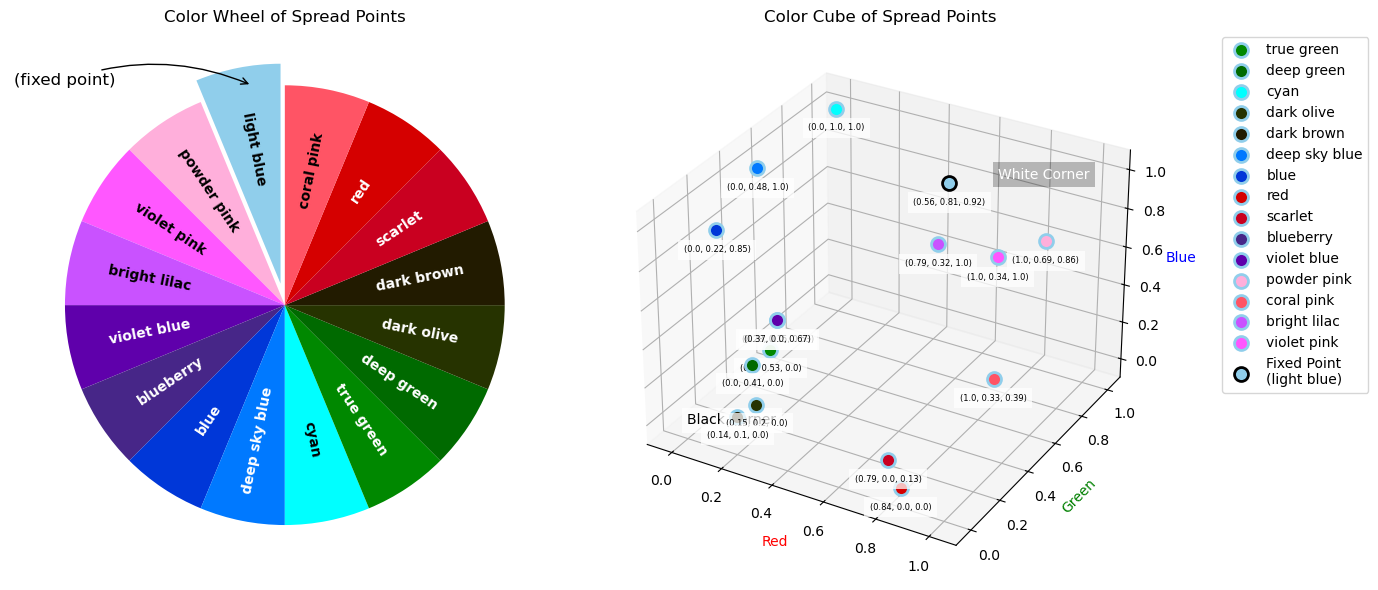

In [8]:

# Visualize the spread points
nu.inspect_spread_points(spread_points, verbose=False)


Notice, above, that the colors are well-spaced on the pie chart but not in the 3D scatterplot.


----